# Exploratory Data Analysis (EDA)

### Imports

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from PIL import Image

In [2]:
random_seed: int = 8080
data_root: Path = Path("../data")
xray_images_root: Path = Path("/home/uziel/Downloads/nih_chest_x_rays")

## 1. Data Loading

### 1.1. Load samples annotation

In [3]:
annot_df = pd.read_csv(data_root.joinpath("samples_annotation_2017.csv"))
annot_df

,image_name,labels,follow_up_#,patient_id,patient_age,patient_gender,view_position,original_image_width,original_image_height,original_image_pixel_spacing_x,original_image_pixel_spacing_y
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143
...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,2048,2500,0.168,0.168
112116,00030802_000.png,No Finding,0,30802,29,M,PA,2048,2500,0.168,0.168
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168
112118,00030804_000.png,No Finding,0,30804,30,F,PA,2048,2500,0.168,0.168


The column `labels` contains all the disease annotations.

### 1.2. Replace `labels` column with dummy variables

In [4]:
labels_dummies = annot_df["labels"].str.get_dummies("|")
labels_dummies.columns = [c.replace(" ", "_").lower() for c in labels_dummies]

In [5]:
annot_df = annot_df.join(labels_dummies).drop(columns=["labels"])
annot_df

,image_name,follow_up_#,patient_id,patient_age,patient_gender,view_position,original_image_width,original_image_height,original_image_pixel_spacing_x,original_image_pixel_spacing_y,...,emphysema,fibrosis,hernia,infiltration,mass,no_finding,nodule,pleural_thickening,pneumonia,pneumothorax
0,00000001_000.png,0,1,58,M,PA,2682,2749,0.143,0.143,...,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,1,1,58,M,PA,2894,2729,0.143,0.143,...,1,0,0,0,0,0,0,0,0,0
2,00000001_002.png,2,1,58,M,PA,2500,2048,0.168,0.168,...,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,0,2,81,M,PA,2500,2048,0.171,0.171,...,0,0,0,0,0,1,0,0,0,0
4,00000003_000.png,0,3,81,F,PA,2582,2991,0.143,0.143,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,1,30801,39,M,PA,2048,2500,0.168,0.168,...,0,0,0,0,1,0,0,0,1,0
112116,00030802_000.png,0,30802,29,M,PA,2048,2500,0.168,0.168,...,0,0,0,0,0,1,0,0,0,0
112117,00030803_000.png,0,30803,42,F,PA,2048,2500,0.168,0.168,...,0,0,0,0,0,1,0,0,0,0
112118,00030804_000.png,0,30804,30,F,PA,2048,2500,0.168,0.168,...,0,0,0,0,0,1,0,0,0,0


## 2. Exploration of patients metadata

### Missing values

In [6]:
annot_df.isna().sum()

image_name                        0
follow_up_#                       0
patient_id                        0
patient_age                       0
patient_gender                    0
view_position                     0
original_image_width              0
original_image_height             0
original_image_pixel_spacing_x    0
original_image_pixel_spacing_y    0
atelectasis                       0
cardiomegaly                      0
consolidation                     0
edema                             0
effusion                          0
emphysema                         0
fibrosis                          0
hernia                            0
infiltration                      0
mass                              0
no_finding                        0
nodule                            0
pleural_thickening                0
pneumonia                         0
pneumothorax                      0
dtype: int64

No missing values in our data.

### Patient information

In [7]:
annot_df.nunique()

image_name                        112120
follow_up_#                          184
patient_id                         30805
patient_age                          107
patient_gender                         2
view_position                          2
original_image_width                 904
original_image_height               1137
original_image_pixel_spacing_x        23
original_image_pixel_spacing_y        23
atelectasis                            2
cardiomegaly                           2
consolidation                          2
edema                                  2
effusion                               2
emphysema                              2
fibrosis                               2
hernia                                 2
infiltration                           2
mass                                   2
no_finding                             2
nodule                                 2
pleural_thickening                     2
pneumonia                              2
pneumothorax    

In [8]:
annot_df.groupby("patient_id")["image_name"].count().mean()

3.639668884921279

We have information for 30,805 patients, with an average of 3 to 4 images available per patient.

In [9]:
patient_had_pneumonia = annot_df.groupby("patient_id")["pneumonia"].sum().astype(bool)
patient_had_pneumonia

patient_id
1        False
2        False
3        False
4        False
5        False
         ...  
30801     True
30802    False
30803    False
30804    False
30805    False
Name: pneumonia, Length: 30805, dtype: bool

In [10]:
patient_had_pneumonia.sum() / len(patient_had_pneumonia)

0.03272196072066223

Around 3% of all patients have had pneumonia.

### Disease Labels

In [11]:
disease_labels = labels_dummies.columns

print(
    f"There are up to {len(disease_labels)} possible disease labels "
    f"(including no finding) annotated in each image:"
)
print("\n\t- " + "\n\t- ".join(disease_labels))

There are up to 15 possible disease labels (including no finding) annotated in each image:

	- atelectasis
	- cardiomegaly
	- consolidation
	- edema
	- effusion
	- emphysema
	- fibrosis
	- hernia
	- infiltration
	- mass
	- no_finding
	- nodule
	- pleural_thickening
	- pneumonia
	- pneumothorax


#### How many annotations per disease?

In [12]:
labels_dummies.sum().sort_values(ascending=False)

no_finding            60361
infiltration          19894
effusion              13317
atelectasis           11559
nodule                 6331
mass                   5782
pneumothorax           5302
consolidation          4667
pleural_thickening     3385
cardiomegaly           2776
emphysema              2516
edema                  2303
fibrosis               1686
pneumonia              1431
hernia                  227
dtype: int64

It can be clearly seen that pneumonia is the second least common labelled disease in our dataset.

### Gender distribution among patients with and without pneumonia

In [13]:
annot_df["patient_gender"].value_counts(normalize=True)

M    0.56493
F    0.43507
Name: patient_gender, dtype: float64

We have data from more males than females, but it's not terribly imbalanced.

### Age distribution among patients with and without pneumonia

<Axes: ylabel='Frequency'>

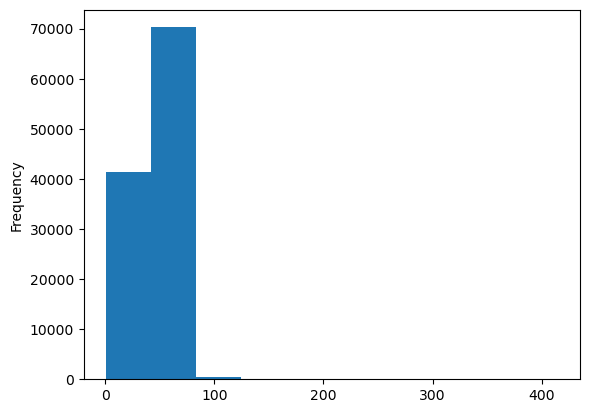

In [14]:
annot_df["patient_age"].plot(kind="hist")

In [15]:
annot_df[annot_df["patient_age"] > 100]["patient_age"].tolist()

[412,
 414,
 148,
 148,
 150,
 149,
 152,
 151,
 411,
 412,
 413,
 412,
 153,
 154,
 155,
 155]

There seems to be some extreme values, probably due to human error. Since they are only a few, we remove them.

In [16]:
annot_df = annot_df[annot_df["patient_age"] < 100]

Now we look at the age distribution across patients with and without pneumonia:

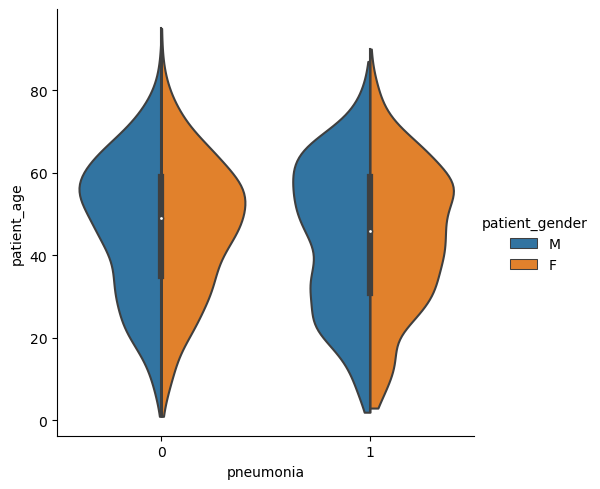

In [17]:
sns.catplot(
    annot_df,
    y="patient_age",
    x="pneumonia",
    hue="patient_gender",
    bw=0.25,
    cut=0,
    split=True,
    kind="violin",
)

Let's look at the quantile distribution:

In [18]:
pneumonia_quantiles = pd.Series(
    {
        f"{q*100:.0f}%": annot_df[annot_df["pneumonia"].astype(bool)][
            "patient_age"
        ].quantile(q)
        for q in np.arange(0.1, 1, 0.1)
    }
)
pneumonia_quantiles

10%    21.0
20%    28.0
30%    34.0
40%    40.0
50%    46.0
60%    52.0
70%    56.0
80%    61.0
90%    66.0
dtype: float64

It seems that most patients (80%) with pneumonia are between the early 20s and the mid 60s. We can expect our algorithm to perform better in this demographic. Outside of it, our model is expected to perform worse. Patients under the age of 20 are likely still growing and thus the size and shape of their chest cavity is likely different, which could impact the performance of the final algorithm. Similarly, the older patients are more likely to suffer from multiple diseases simultanously, making it harder to distinguish between pneumonia and any other disease.

### View Position distribution among patients with and without pneumonia

In [19]:
annot_df["view_position"].value_counts(normalize=True)

PA    0.600326
AP    0.399674
Name: view_position, dtype: float64

Our dataset contains both posterior-anterior (PA) and anterior-posterior (AP) projections.

- **PA projection**: The standard chest radiograph is acquired with the patient standing up, and with the X-ray beam passing through the patient from Posterior to Anterior. The chest X-ray image produced is viewed as if looking at the patient from the front, face-to-face. The heart is on the right side of the image as you look at it.
- **AP projection**: Sometimes it is not possible for radiographers to acquire a PA chest X-ray. This is usually because the patient is too unwell to stand. The chest X-ray image is still viewed as if looking at the patient face-to-face.

Source and more information on [Radiology Masterclass](https://www.radiologymasterclass.co.uk/tutorials/chest/chest_quality/chest_xray_quality_projection).

<Axes: xlabel='pneumonia', ylabel='Percent'>

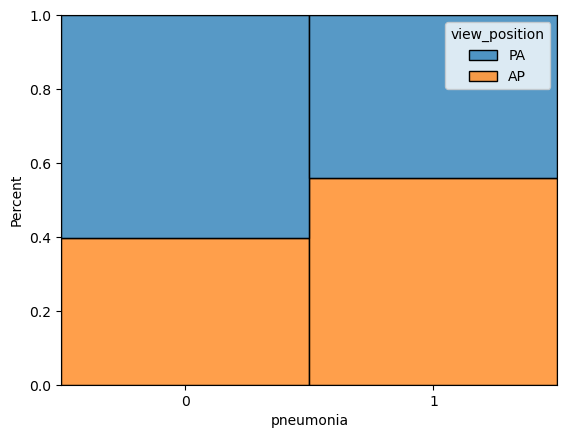

In [20]:
sns.histplot(
    annot_df.astype({"pneumonia": str}),
    x="pneumonia",
    hue="view_position",
    stat="percent",
    multiple="fill",
)

In [21]:
view_positions_with = (
    annot_df[annot_df["pneumonia"] == 1]["view_position"]
    .value_counts(normalize=True)
    .rename("Pneumonia presence")
)
view_positions_without = (
    annot_df[annot_df["pneumonia"] == 0]["view_position"]
    .value_counts(normalize=True)
    .rename("Pneumonia abscence")
)
pd.concat(
    [
        view_positions_with,
        view_positions_without,
        abs(view_positions_without - view_positions_with).rename("Difference"),
    ],
    axis=1,
)

,Pneumonia presence,Pneumonia abscence,Difference
AP,0.559441,0.397609,0.161831
PA,0.440559,0.602391,0.161831


Since the main difference between AP and PA is heart size, this shouldn't affect our ability to detect pneumonia. Therefore, we expect this 16% difference to have no impact on final model performance.

### Disease comorbidity

In [22]:
comobidity_mat = annot_df[disease_labels].T.dot(annot_df[disease_labels])
np.fill_diagonal(comobidity_mat.values, 0)
comobidity_mat

,atelectasis,cardiomegaly,consolidation,edema,effusion,emphysema,fibrosis,hernia,infiltration,mass,no_finding,nodule,pleural_thickening,pneumonia,pneumothorax
atelectasis,0,370,1223,221,3275,424,220,40,3264,739,0,590,496,262,774
cardiomegaly,370,0,169,127,1063,44,52,7,587,102,0,108,111,41,49
consolidation,1223,169,0,162,1287,103,79,4,1221,610,0,428,251,123,223
edema,221,127,162,0,593,30,9,3,981,129,0,131,64,340,33
effusion,3275,1063,1287,593,0,359,188,21,4000,1254,0,912,849,268,996
emphysema,424,44,103,30,359,0,36,4,449,215,0,115,151,23,747
fibrosis,220,52,79,9,188,36,0,8,345,117,0,166,176,11,80
hernia,40,7,4,3,21,4,8,0,33,25,0,10,8,3,9
infiltration,3264,587,1221,981,4000,449,345,33,0,1157,0,1546,750,605,946
mass,739,102,610,129,1254,215,117,25,1157,0,0,906,451,71,431


<Axes: >

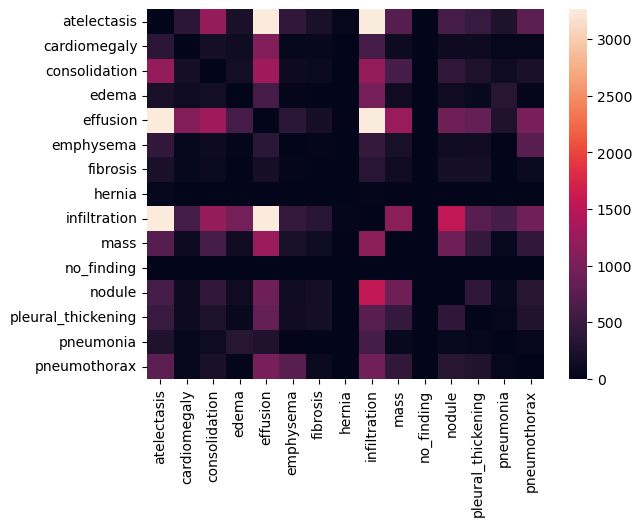

In [23]:
sns.heatmap(comobidity_mat, robust=True)

In [24]:
((comobidity_mat["pneumonia"] / annot_df["pneumonia"].sum()) * 100).round(
    2
).sort_values(ascending=False)

infiltration          42.31
edema                 23.78
effusion              18.74
atelectasis           18.32
consolidation          8.60
mass                   4.97
nodule                 4.90
pleural_thickening     3.36
cardiomegaly           2.87
pneumothorax           2.87
emphysema              1.61
fibrosis               0.77
hernia                 0.21
no_finding             0.00
pneumonia              0.00
Name: pneumonia, dtype: float64

Above shows the most common comorbid diseases with pneumonia: infiltration, edema, effusion, etc. The percentages show how many pneumonia cases were also labelled as another disease. Again, infiltration was the most common, appearing in 42% of pneumonia cases.

## 3. Exploration of image pixel data

### Healthy patients (no disease detected)

In [25]:
healthy_images = (
    annot_df[annot_df["no_finding"] == 1]
    .sample(100, random_state=random_seed)["image_name"]
    .tolist()
)
healthy_images_files = [
    img_file
    for img_file in xray_images_root.glob("**/*.png")
    if img_file.name in healthy_images
]

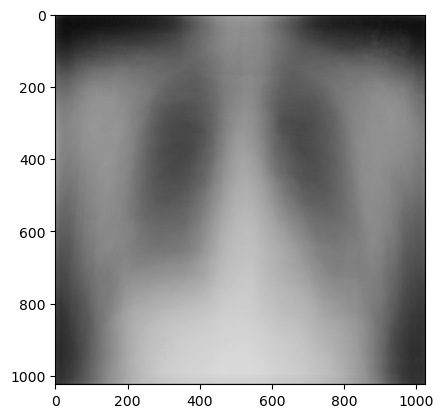

In [38]:
avg_healthy_image = np.mean(
    [np.array(Image.open(img_file).convert('L')) for img_file in healthy_images_files], axis=0
)
plt.imshow(avg_healthy_image, cmap="gray", vmin=0, vmax=255)

While we can observe blurred edges and cavities probably due to sligh differences in patients, overall the lung area looks clear in healthy patients.

### Pneumonia patients

In [27]:
pneumonia_images = (
    annot_df[annot_df["pneumonia"] == 1]
    .sample(100, random_state=random_seed)["image_name"]
    .tolist()
)
pneumonia_images_files = [
    img_file
    for img_file in xray_images_root.glob("**/*.png")
    if img_file.name in pneumonia_images
]

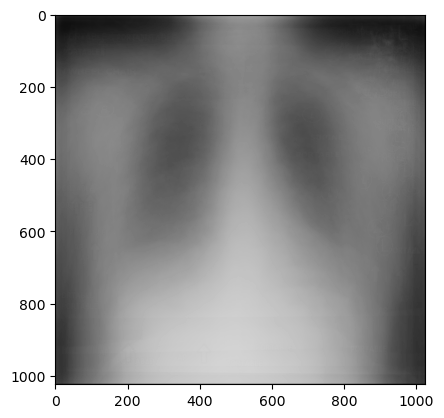

In [39]:
avg_pneumonia_image = np.mean(
    [np.array(Image.open(img_file).convert('L')) for img_file in pneumonia_images_files], axis=0
)
plt.imshow(avg_pneumonia_image, cmap="gray", vmin=0, vmax=255)

Compared to healthy patients, we can see that the lung area is significantly more opaque. This suggests that on average, pneumonia patients show white spots in their lungs, as expected.

## 4. Summary and conclusions

In [41]:
annot_df.to_csv(data_root.joinpath("processed_annotations.csv"), index=False)

Given the exploratory data analysis above, we will be using the processed sample annotations to train a classifier machine learning model to output a probability of whether pneumonia is present or absent in a given x-ray image.

We should ensure that patients are separated into training and validation sets to avoid data leakage. Moreover, other metadata such as gender and age should also be equally distributed in each set.